<h2>Introduction</h2>
<p><strong>The Casual Organisation for Public Safety(COPS)</strong> is the name of the team, consisting of Luke Williams, Alexander Chlpka and Zi Han Ding. We decided that the best neighborhood should be determined by its safety and available facilities. The way we determined each of our metrics is through the WPRDC and by having a theme at the start. We looked for each of our metrics based on the idea of public safety. We have looked for alternatives, for example, at the start of our project, we explored data that are related to public health as well. The final metric was decided after we combined all of our graphs and data together.</p>

In [2]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import numpy as np #importing numpy
%matplotlib inline

<h2>Importing all the data</h2>
<p>Importing all the data by using the links from the official site</p>

In [3]:
polInc = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b") #Importing data of police incidents in the last 30 days
polInc.drop(["PK", "INCIDENTZONE", "CCR"], axis = 1) #dropping the columns that is police specific such as incident ID
polIncDF = pd.DataFrame(polInc) #Making the dataframe
polIncDF = polIncDF.groupby("INCIDENTNEIGHBORHOOD").count()
polIncDF.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county

In [4]:
polIncDF2 = pd.DataFrame(polInc) #Making the second dataframe for another standard
polIncDF2 = polIncDF2.groupby("INCIDENTNEIGHBORHOOD")["HIERARCHY"].max() #Finding out the most sever crime based on UCR Hierarchy, but this converts the dataframe to a series
polIncDF2 = pd.DataFrame(polIncDF2) #Turning the series back into a dataframe
polIncDF2.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county

In [5]:
polIncDFFin = pd.merge(polIncDF.sort_values(by = "OFFENSES"), polIncDF2.sort_values(by = "HIERARCHY"), on = ["INCIDENTNEIGHBORHOOD"]) #Merge
polIncDFFin.drop(polIncDFFin.columns.difference(["HIERARCHY_y", "INCIDENTNEIGHBORHOOD", "OFFENSES"]), 1, inplace = True) #Removing all columns except the ones we want
polIncDFFin.rename(columns = {"INCIDENTNEIGHBORHOOD":"Neighborhoods", "HIERARCHY_y":"Hierarchy", "OFFENSES":"Number of Incidents"}, inplace = True) #Changeing column names for presentation

In [7]:
pf = pd.read_csv("https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170")

In [8]:
publicFac = pd.DataFrame(pf) #Making the dataframe for public facilities
publicFac = publicFac.groupby("neighborhood").count()
publicFac.drop(publicFac.columns.difference(["inactive", "neighborhood"]), 1, inplace = True) #dropping irrelevant columns

<h2>Merging</h2>

In [9]:
preMerged = pd.merge(polIncDFFin, publicFac.sort_values(by = "inactive"), left_index = True, right_index = True) #Merging and telling pandas to merge by index
preMerged.head() #top five values

Number of Incidents  Hierarchy  inactive
Regent Square                     1          0         4
Swisshelm Park                    2         99         1
Glen Hazel                        3         99         1
Hays                              4         99         2
Allegheny West                    8         27         3

In [10]:
fire_DS = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")

In [12]:
fire_DF = pd.DataFrame(fire_DS) #fire alarm dataframe
fire_DF = fire_DF.groupby("neighborhood").count() 
fire_DF.drop(fire_DF.columns.difference(["neighborhood", "alarms"]), 1, inplace = True) #dropping irrelevant columns again
fire_DF.head()

alarms
neighborhood             
Allegheny Center       50
Allegheny West         34
Allentown              99
Arlington              40
Arlington Heights      12

In [11]:
finalMerged = pd.merge(preMerged, fire_DF, left_index = True, right_index = True) #final merge
finalMerged = pd.DataFrame(finalMerged)

<h2>Initial graph of raw data</h2>
<p>This is basically combining all of our data into one place.</p>

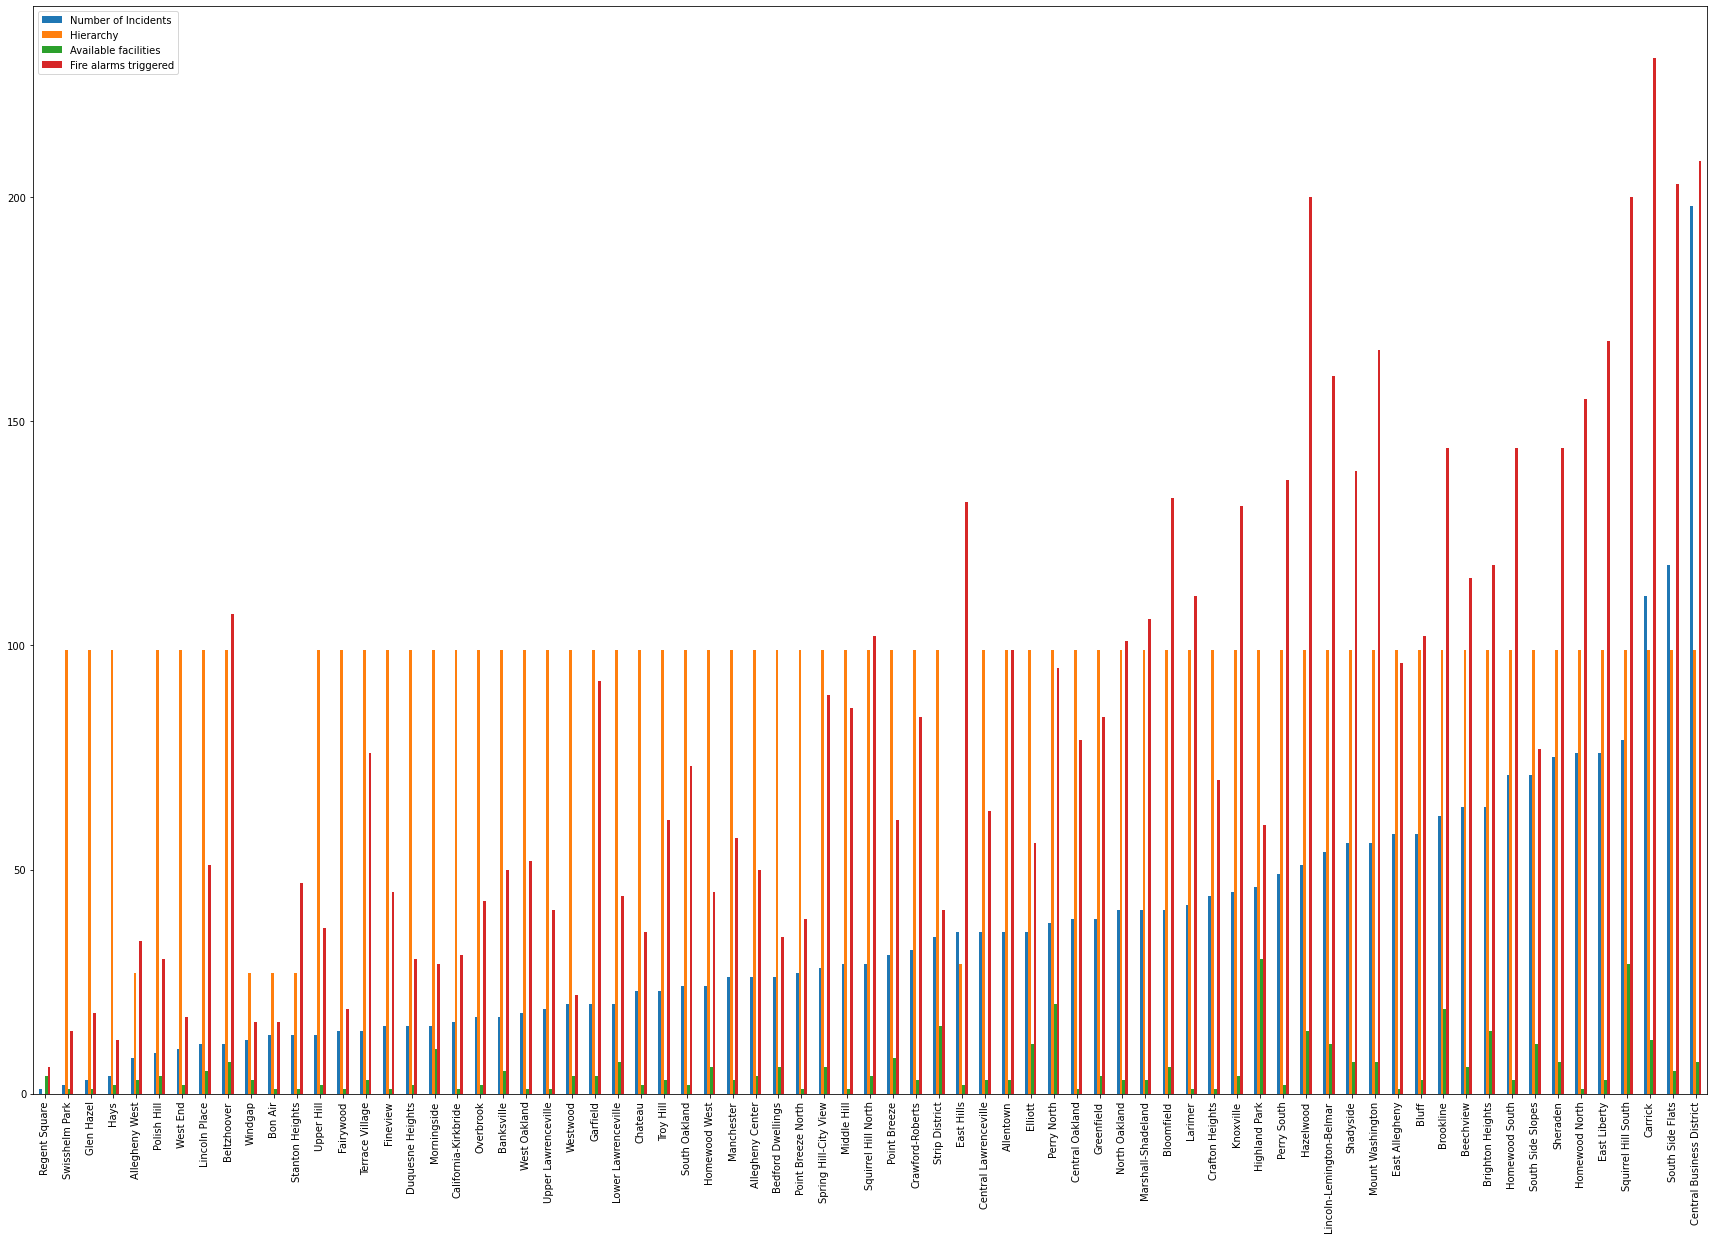

In [12]:
finalMerged.rename(columns = {"inactive":"Available facilities", "alarms":"Fire alarms triggered"}, inplace = True) #replacing names for presentation
finalMerged.sort_values(by = ["Number of Incidents", "Hierarchy", "Available facilities", "Fire alarms triggered"]).plot(kind = "bar", figsize = (30, 20)) #make sure all values are sorted


<h2>Raw Data Top Five</h2>

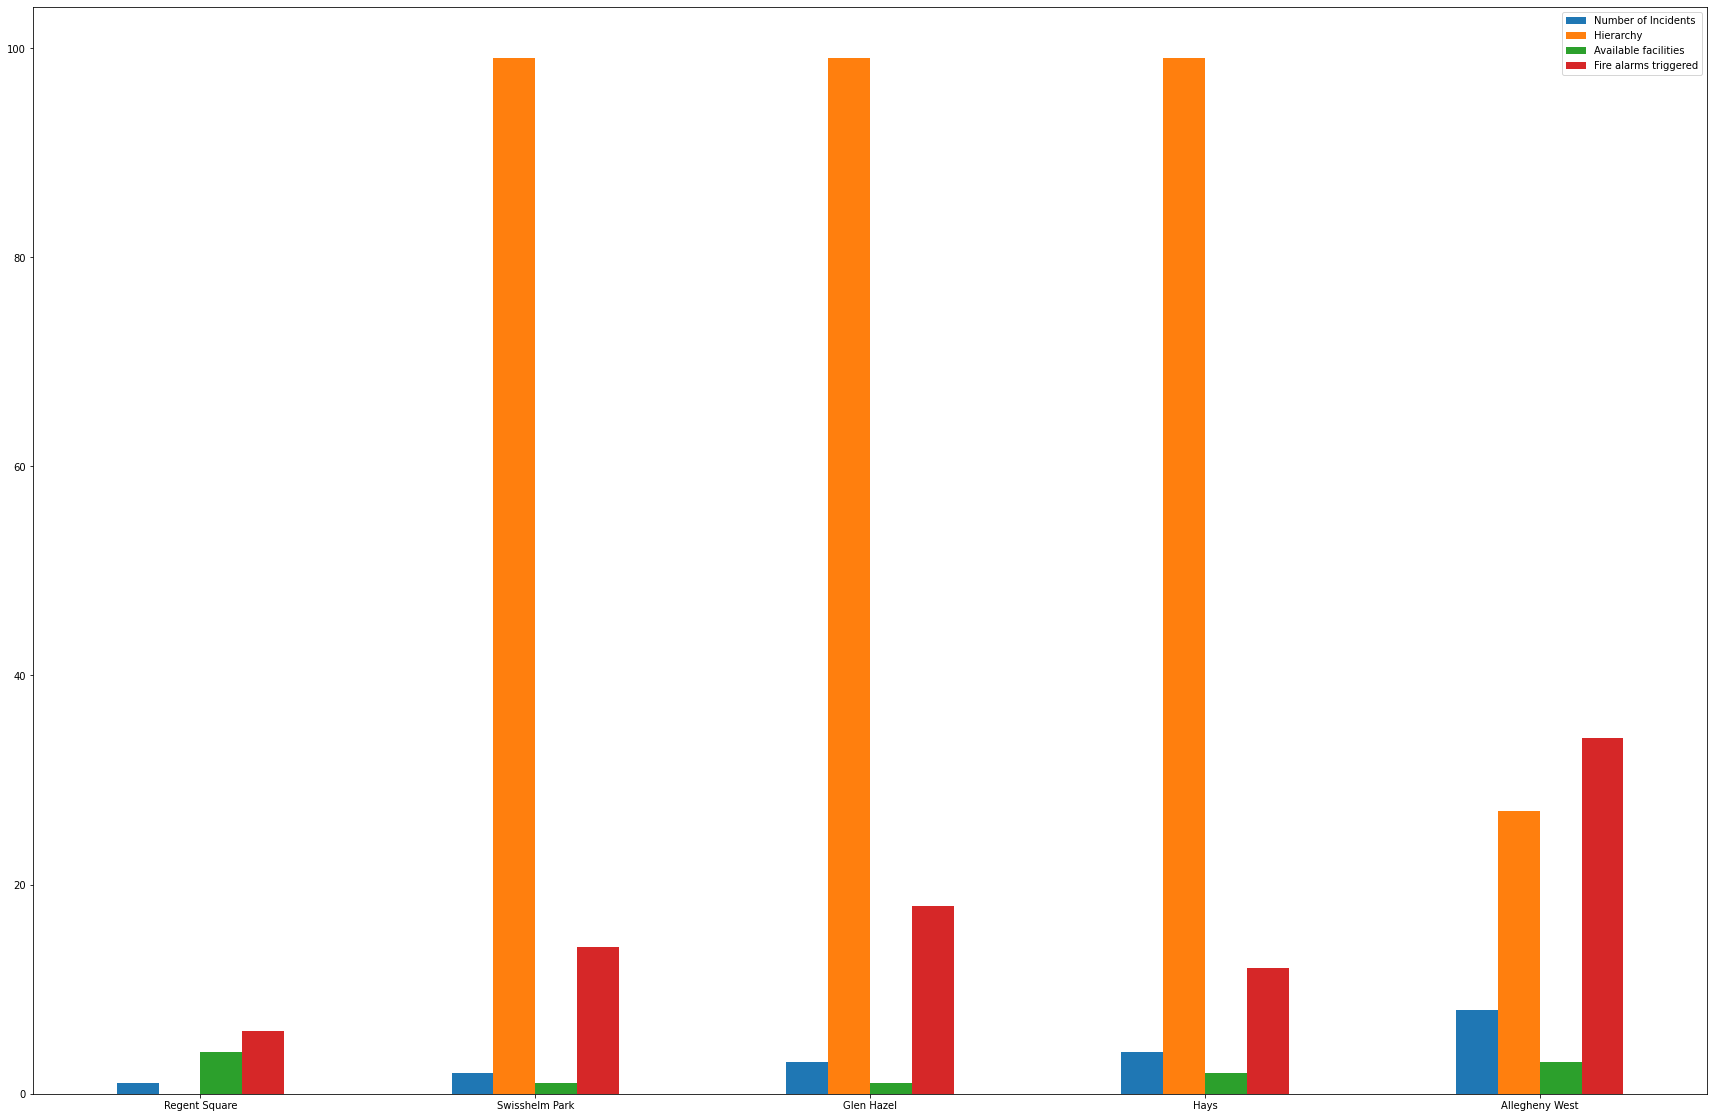

In [13]:
finalMerged.sort_values(by = ["Number of Incidents", "Hierarchy", "Available facilities", "Fire alarms triggered"]).head().plot(kind = "bar", figsize = (30, 20), rot = 0) #displaying top five
plt.style.use("seaborn") #adding style

## Finishing Up

Because the data above doesn't clearly define a "winner" for best neighborhood, we needed to play with the data a little bit more. Below, we combine all the data into one single metric that determines the best neighborhood in Pittsburgh. The metric takes into account both the 'good' and 'bad' metrics and adjusts the numbers accordingly.

In [14]:
print(fire_DF) ##Make sure that the alarms data is ready to combine

                     alarms
neighborhood               
Allegheny Center         50
Allegheny West           34
Allentown                99
Arlington                40
Arlington Heights        12
...                     ...
Upper Lawrenceville      41
West End                 17
West Oakland             52
Westwood                 22
Windgap                  16

[91 rows x 1 columns]


In [15]:
print(publicFac) ##Make sure that the public facilities are ready to combine

                     inactive
neighborhood                 
Allegheny Center            4
Allegheny West              3
Allentown                   3
Banksville                  5
Bedford Dwellings           6
...                       ...
Upper Lawrenceville         1
West End                    2
West Oakland                1
Westwood                    4
Windgap                     3

[75 rows x 1 columns]


In [19]:
print(preMerged["Number of Incidents"]) ##Make sure that the number of incidents is ready to combine

Regent Square                  1
Swisshelm Park                 2
Glen Hazel                     3
Hays                           4
Allegheny West                 8
                            ... 
Homewood North                76
Squirrel Hill South           79
Carrick                      111
South Side Flats             118
Central Business District    198
Name: Number of Incidents, Length: 73, dtype: int64


In [36]:
firesAndIncidents = fire_DF["alarms"] + preMerged["Number of Incidents"] ##Combine then print fires and incidents

Here we combined the fire data and the police incident data to get one 'bad' metric. These datasets are similar enough that it was okay to just add the numbers within each neighborhood together and we didn't need to do anything super fancy with it.

In [37]:
normalized = firesAndIncidents.div(10) ##Divide by 10 to get a more normalized metric

After we added the two bad metrics together, we needed to divide the totals by 10 to get the data to be more 'normal' compared to the public facilities data. 

In [103]:
finalMetric = publicFac["inactive"] - normalized ##Combine the normalized metric with the incidents to get our final metric
finalMetric = finalMetric.dropna() ##Drop values that came out to 'NaN'
finalMetric = finalMetric.sort_values(0, ascending = False, na_position='first') ##Sort the data in ascending order because the 'best' neighborhood in our metric is actually the 'least bad'
topTen = finalMetric.head(10) ##Create a top ten list to make graphing much cleaner

The bad metrics get subtracted from the public facilities because we want the 'best' neighborhood to have a positive value, if we subtracted the number of facilities from the bad metrics, our best neighborhood would most likely be a negative number. After we combine all the data, we drop the values that came out to 'NaN' since they would fill up the graph and mess up the data. We sort by descending values because the higheset number will be our best neighborhood, and then we cut it down to only the top ten neighborhoods to make things more readable

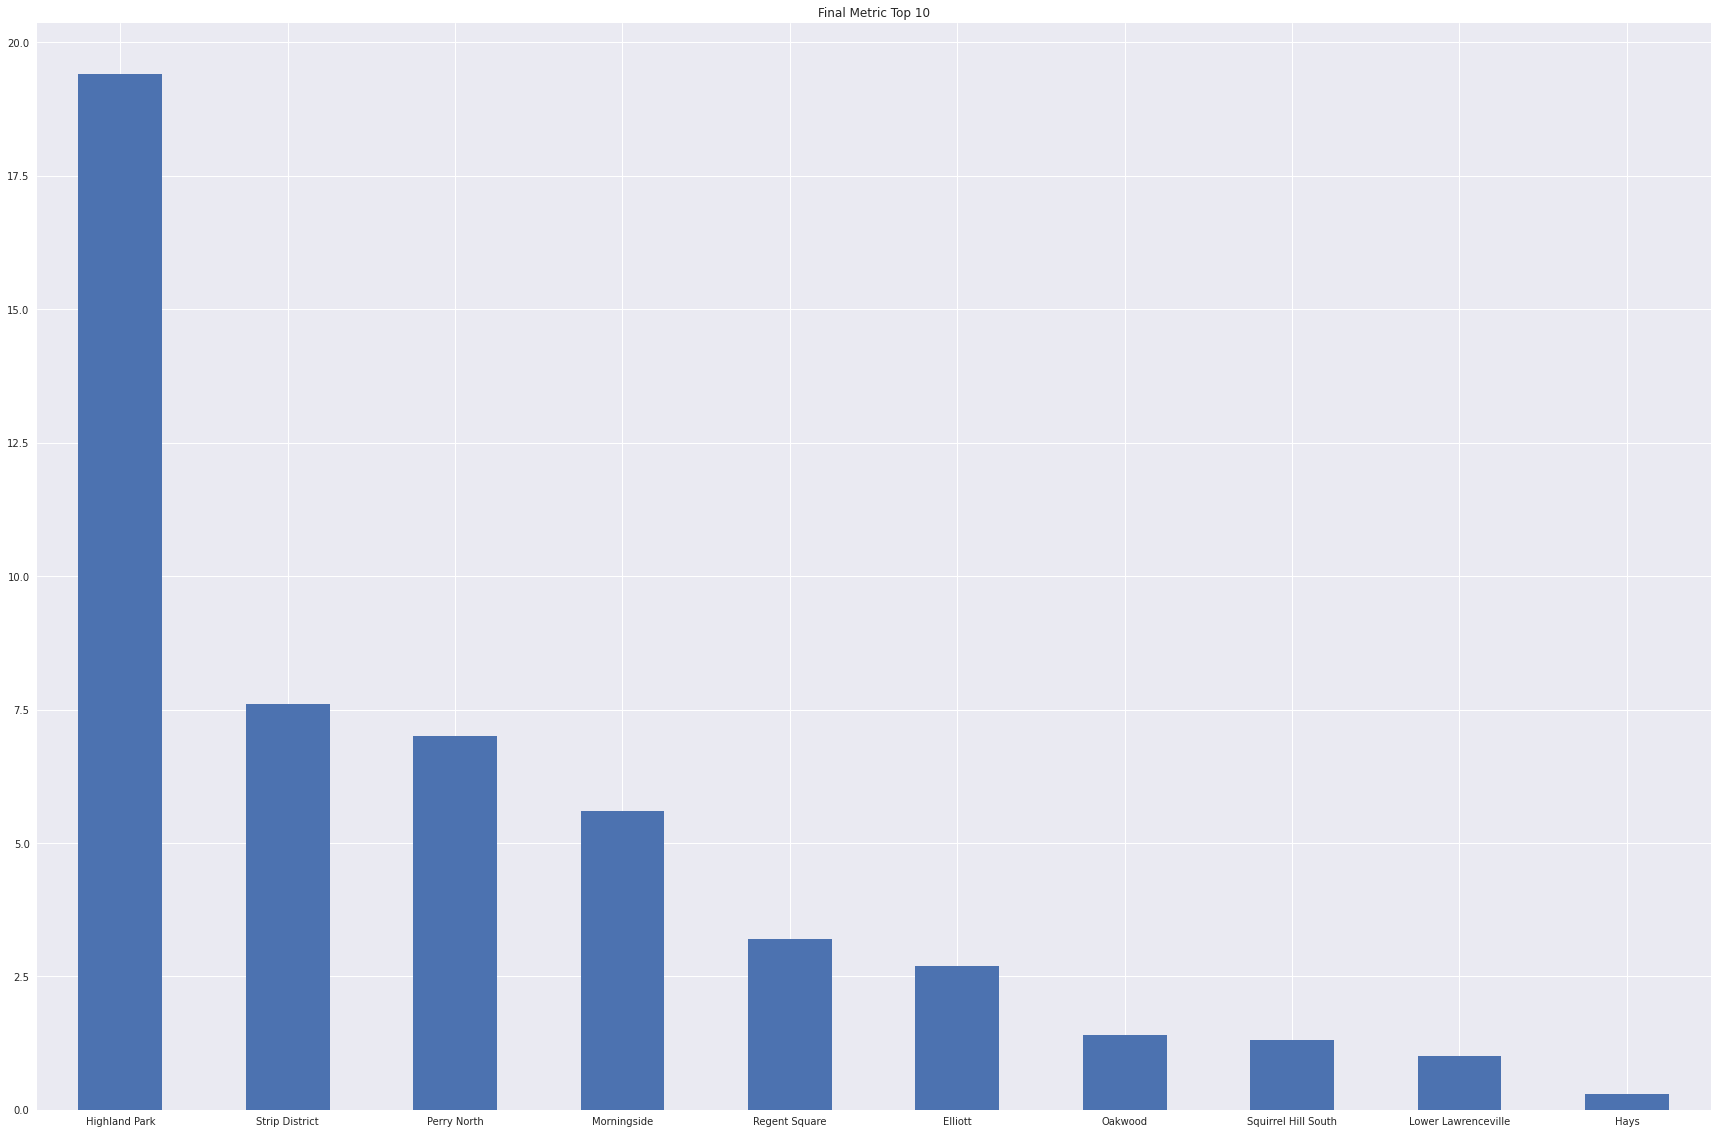

In [43]:
topTen.plot(kind = "bar", figsize = (30, 20), rot = 0, title="Final Metric Top 10") ##Plot the top ten neighborhoods as decided by our metric
##The overall metric formula is this: Number of available facilities - Number of fires and police incidents
##This is done because available facilities is a good thing, and fires+incidents is a 'bad' metric, so the winner is the one with the highest facility:fires+incidents ratio

# Conclusions

## Alex Chlpka:
As we can see from the graph above, when we account for all the data - good and bad - we get Highland Park as our winner for best neighborhood in Pittsburgh with the Strip District and Perry North as our runners-up. Personally, I have only been to the Strip District out of our top three, but with that knowledge I think our conclusion is fairly agreeable. After looking up recent news in the other top three neighborhoods, it is a little surprising to see Perry North so high up, but that is because there was recently a natural disaster that occured, which our metrics do not account for. Highland Park does seem to fit the bill of our best neighborhood because it looks like it has a high number of facilities and there was not much news about police incidents or fires in the area.

# Luke Williams
I think that the metrics our group used were accurate and relevant for determining the best neighborhood. Personally, I'm not confident in what my favorite neighborhood in Pittsburgh would be, since I've only been here for a few months and I've only been to a handful on the west side and downtown (North/South Squirrel Hill, North/South/Central Oakland, Shadyside, etc). If I had to choose a favorite out of the small number of neighborhoods I've visited, I would have to say Squirrel Hill South because of the great food, shops, and how easy it is to get around. Though it didn't affect how I determined my personal favorite neighborhood, Squirrel Hill South also has the 2nd highest amount of public facilities in the city, which was the metric that I used in my individual notebook. 


<h1>Zi Han Ding</h1>
<p>While I haven't been to Pittsburgh yet, I am confident in our metrics and the data collected, which does suggest that Highland Park is the safest neighborhood in Pitt right now. Personally, I would just like to know the city in general and see the sights. Although I will keep this data in mind, I hope to enjoy the culture within the city. I also hope to compare how the neighborhoods in Pitt feels to the neighborhoods in Budapest, which rarely have skyscrapers, due to regulations. It is however, interesting to see that there are so many neighborhoods in Pitt.</p>